In [2]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews

from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
cats = movie_reviews.categories() # the function catergory() return tags(pos or neg) which represent positive or negative
reviews = []
for cat in cats: # for each category
    for fid in movie_reviews.fileids(cat): # for each file id: get the words of reviews for certain category
        review = (list(movie_reviews.words(fid)), cat)
        reviews.append(review) # add the words to the list
random.shuffle(reviews) # shuffle the reviews

In [13]:
all_wd_in_reviews = nltk.FreqDist(wd.lower() for wd in movie_reviews.words()) # convert to lower case and store in a frequency distribution
top_wd_in_reviews = [list(wds) for wds in zip(*all_wd_in_reviews.most_common(2000))][0] # get the most frequent 2000 words

In [14]:
def ext_ft(review, top_words):
    review_wds = set(review)
    ft = {}
    for wd in top_words:
        ft['word_present({})'.format(wd)] = (wd in review_wds)
    return ft

In [15]:
feature_sets = [(ext_ft(d, top_wd_in_reviews), c) for (d, c) in reviews]
train_set, test_set = feature_sets[200:], feature_sets[:200]

In [16]:
classifier = NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.775


In [17]:
classifier.show_most_informative_features(10)

Most Informative Features
      word_present(jedi) = True              pos : neg    =     10.9 : 1.0
word_present(outstanding) = True              pos : neg    =     10.3 : 1.0
     word_present(mulan) = True              pos : neg    =      7.6 : 1.0
     word_present(damon) = True              pos : neg    =      7.2 : 1.0
    word_present(seagal) = True              neg : pos    =      6.7 : 1.0
word_present(wonderfully) = True              pos : neg    =      6.1 : 1.0
    word_present(wasted) = True              neg : pos    =      5.6 : 1.0
     word_present(awful) = True              neg : pos    =      5.5 : 1.0
    word_present(poorly) = True              neg : pos    =      5.4 : 1.0
      word_present(lame) = True              neg : pos    =      5.3 : 1.0


In [18]:
d_vect = None
def get_train_test(tr_set, te_set):
    global d_vect
    d_vect = DictVectorizer(sparse=False)
    X_tr, y_tr = zip(*tr_set)
    X_tr = d_vect.fit_transform(X_tr)
    X_te, y_te = zip(*te_set)
    X_te = d_vect.transform(X_te)
    return X_tr, X_te, y_tr, y_te

In [19]:
X_train, X_test, y_train, y_test = get_train_test(train_set, test_set)
rf = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=10)

In [20]:
preds = rf.predict(X_test)
print(accuracy_score(y_test, preds))

0.795


In [22]:
confusion_matrix = confusion_matrix(y_test, preds)

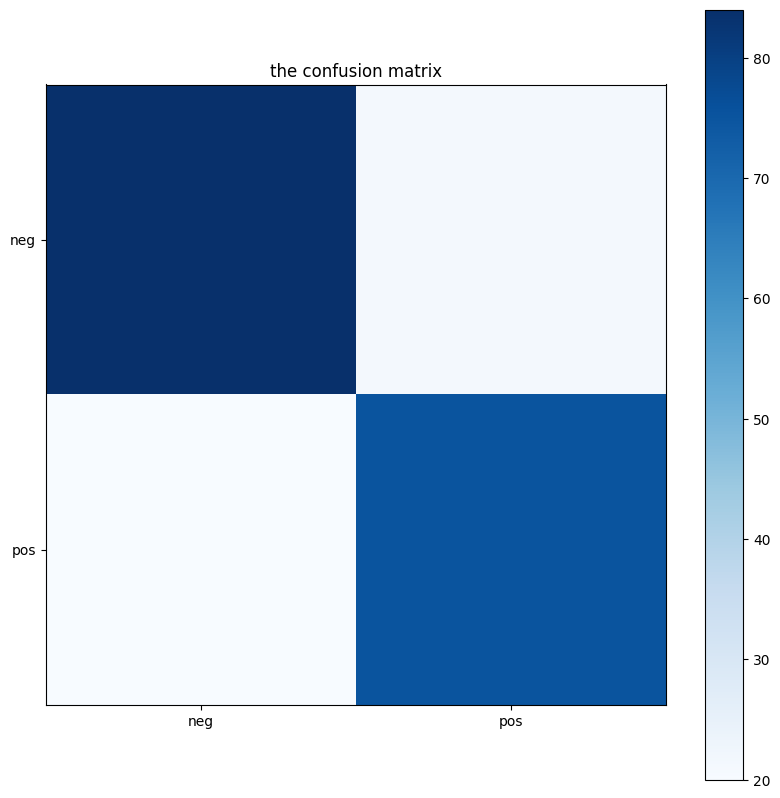

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(len(rf.classes_)), rf.classes_)
plt.yticks(np.arange(len(rf.classes_)), rf.classes_)
plt.title("the confusion matrix")
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.colorbar()